## * DOMAIN: Telecom 
## * CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs. 

In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

import pickle

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,recall_score,precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier

In [2]:
# Importing all the data to a dataframe


df = pd.read_csv('TelcomCustomer-Churn.csv')

In [3]:
# exploring the final shape and size

df.shape

(7043, 21)

In [4]:
#Checking the datatype

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Checking for nulls

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Checking the types and non null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### The TotalCharges column is of the type object but in reality it is supposed to be a numerical column. The change from categorical to continuos and filling in the missing values will be done by using a function in python.

In [7]:
#Creating a function that will convert categorical to numerical and dropping the unwanted columns

feature_with_blank = []
def missingvalue(dataframe):
    for feature in dataframe.columns:
        if any(dataframe[feature] == ' '):
            feature_with_blank.append(feature)
            dataframe.replace(' ', np.nan, inplace=True)
            dataframe[feature] = dataframe[feature].astype(float)
            dataframe[feature].fillna(value = dataframe[feature].median(),inplace=True)
    dataframe.drop('customerID',axis = 1,inplace = True)

In [8]:
#executing the function

missingvalue(df)

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* ###  gender: 
It is a categorical column and has 2 unique values in it. Male is the most occuring value
* ###  SeniorCitizen: 
It is a categorical column where the values are either 0 to 1
* ###  Partner: 
It is a categorical column where the values are either Yes or No. No is the most occuring value
* ###  Dependents: 
It is a categorical column where the values are either Yes or No.No is the most occuring value
* ###  tenure: 
It is a continous variable where the min is 0 and max is 72. The mean is slightly greater than the median. It might follow a normal distribution. The min value cannot be 0 because it denotes how long have they been a customer. Might be due to human error
* ###  PhoneService: 
It is a categorical column where the values are either Yes or No. Yes is the most occuring value
* ### MultipleLines:
It is a categorical column with 3 unique values. No is the most occuring value
* ### InternetService:
It is a categorical column with 3 unique values.Fiber optic is the most occuring value
* ### OnlineSecurity
It is a categorical column with 3 unique values. No is the most occuring value
* ### OnlineBackup
It is a categorical column with 3 uique values.No is the most occuring value
* ### DeviceProtection
It is a categorical column with 3 unique values. No is the most occuring value
* ### TechSupport
It is a categorical column with 3 unnique values. No is the most occuring value
* ### StreamingTV
It is a categorical column with 3 unnique values. No is the most occuring value
* ### StreamingMovies
It is a categorical column with 3 unnique values. No is the most occuring value
* ### Contract
It is a categorical column with 3 unnique values. Month-to-month is the most occuring value
* ### PaperlessBilling
It is a categorical column with 2 uique values.Yes is the most occuring value.
* ### PaymentMethod
It is a categorical column with 4 unique values.Electronic check is the most occuring value.
* ### MonthlyCharges
It is a continous column.The min value is 18.25 and max is 118.75. Mean is less than the median. It can be left skewed.
* ### TotalCharges
It is a continous column.The min value is 18.8 and max is 8684.8. Mean is greater than the median. It is right skewed.
* ### Churn
It is a categorical column with 2 uique values. No is the most occuring value.

In [10]:
# Checking for values which has tenure as 0

df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.475,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.475,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1397.475,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1397.475,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1397.475,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1397.475,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1397.475,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1397.475,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1397.475,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1397.475,No


In [11]:
# Since all of the value which have tenure is equal to 0 has churn as No. We are using those values to replace the 0 value

replace_value = df.loc[df['Churn']=='No','tenure'].median()

In [12]:
df['tenure'] = np.where(df['tenure'] == 0, replace_value, df['tenure'])

## Univariate Analysis

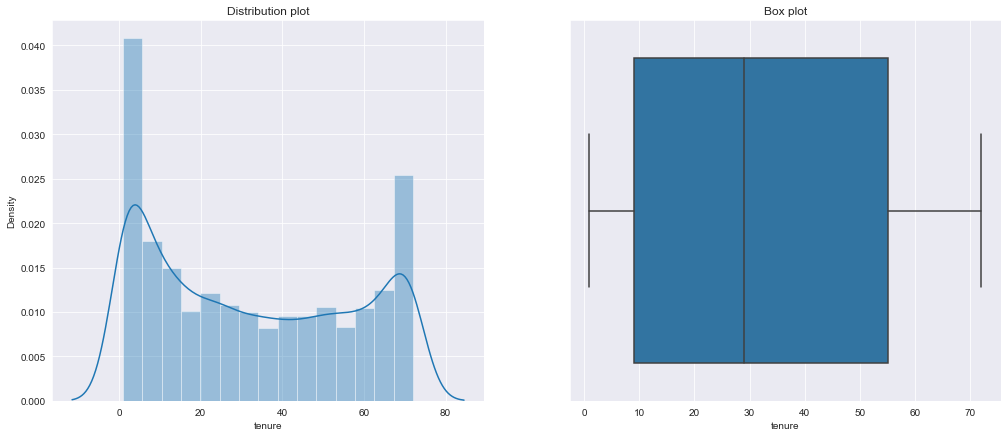

In [13]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'tenure', data=df,  orient='h' , ax=axes[1]);
sns.distplot(df['tenure'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

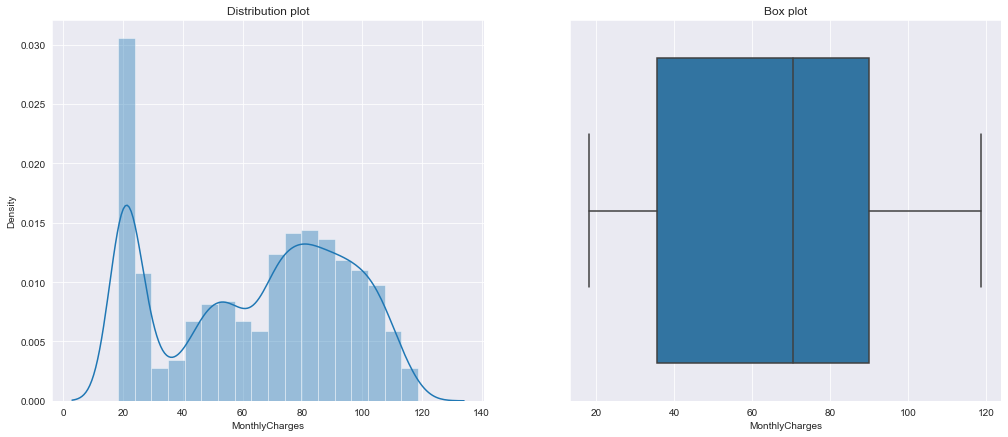

In [14]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyCharges', data=df,  orient='h' , ax=axes[1]);
sns.distplot(df['MonthlyCharges'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

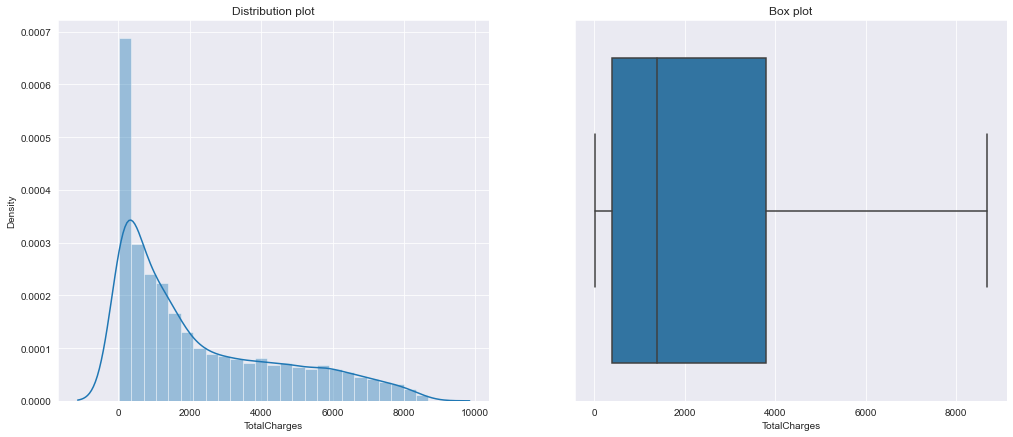

In [15]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'TotalCharges', data=df,  orient='h' , ax=axes[1]);
sns.distplot(df['TotalCharges'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

* ### tenure:
It almost follows a normal distribution and has 2 peaks. It is slightly skewed to the right and has no outliers

* ### MonthlyCharges:
It has a single peak and skewed to the left with no outliers

* ### TotalCharges:
It has a single peak and is heavily right skewed with no outliers.

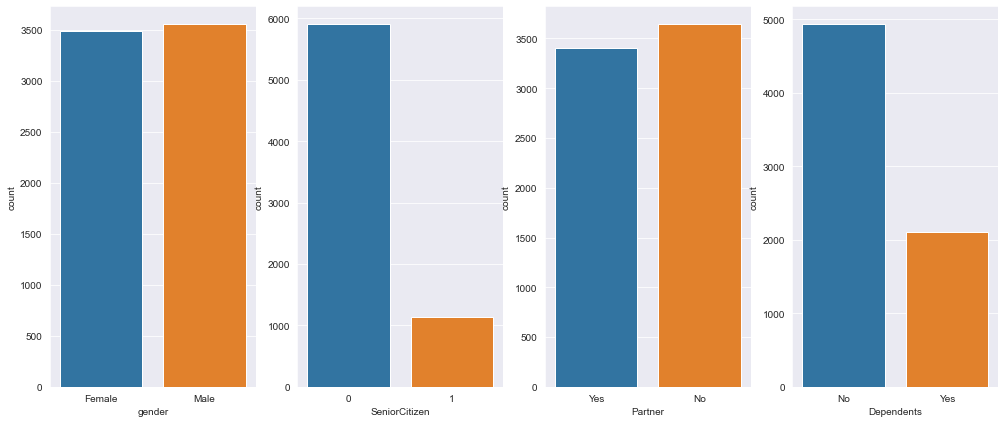

In [16]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'gender',data = df,ax = axes[0]);
sns.countplot(x = 'SeniorCitizen',data = df,ax = axes[1]);
sns.countplot(x = 'Partner',data = df,ax = axes[2]);
sns.countplot(x = 'Dependents',data = df,ax = axes[3]);

* ### gender:
The count of both the categories are almost the same
* ### SeniorCitizen:
The count of SeniorCitizen of value 0 is much greater than SeniorCitizen of value 1
* ### Partner
The count of both the categories of Partner are almost the same
* ### Dependents
The count of Dependents of value No is much greater than Dependents of value Yes

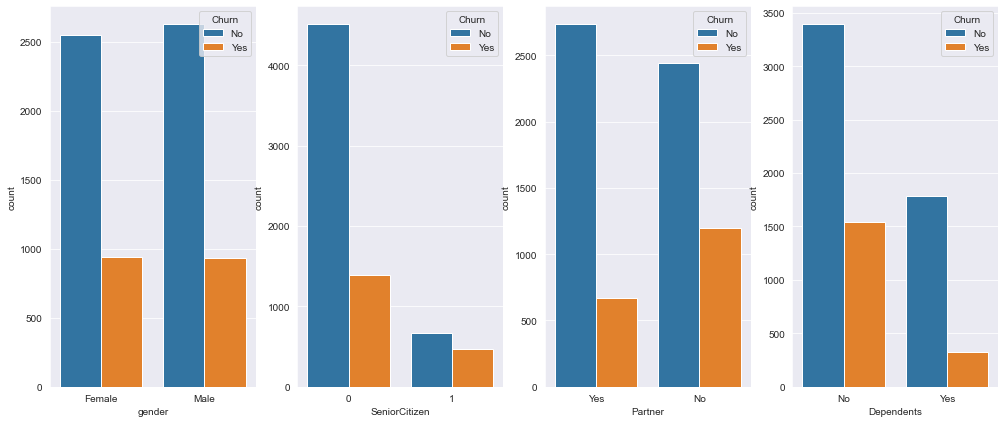

In [17]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'gender',data = df,hue = "Churn",ax = axes[0]);
sns.countplot(x = 'SeniorCitizen',data = df,hue = "Churn",ax = axes[1]);
sns.countplot(x = 'Partner',data = df,hue = "Churn",ax = axes[2]);
sns.countplot(x = 'Dependents',data = df,hue = "Churn",ax = axes[3]);

* ## The count of customers who have not Churned are significantly higher than the people who have churned in variables - gender, SeniorCitizen, Partner and Dependents.

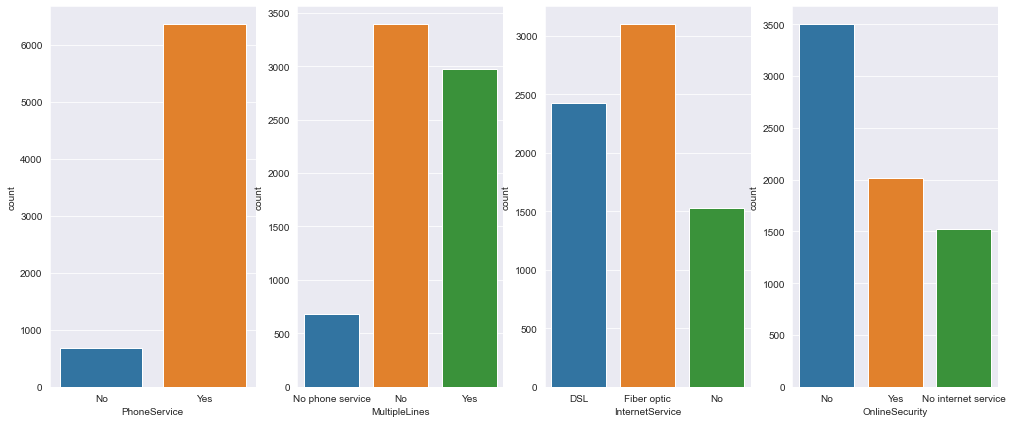

In [18]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'PhoneService',data = df,ax = axes[0]);
sns.countplot(x = 'MultipleLines',data = df,ax = axes[1]);
sns.countplot(x = 'InternetService',data = df,ax = axes[2]);
sns.countplot(x = 'OnlineSecurity',data = df,ax = axes[3]);

* ### PhoneService
The count of Phone Service having value as Yes is much greater than the count of Phone Service having value as No
* ### MultipleLines
The count of Multiple Lines No and Yes are similar when compared to the count of No phone service. This tells that most of the customers have got PhoneService with multiple or phone service with no multiple lines
* ### InternetService
The count of Fiber Optic and DSL is higher than that of customers with No Internet Service
* ### OnlineSecurity
Most of customers have not opted to have OnlineSecurity.

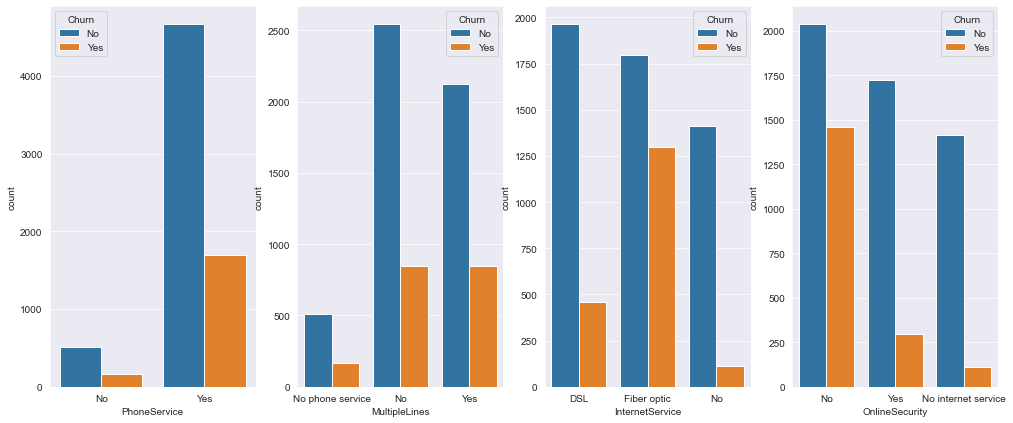

In [19]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'PhoneService',hue = "Churn",data = df,ax = axes[0]);
sns.countplot(x = 'MultipleLines',hue = "Churn",data = df,ax = axes[1]);
sns.countplot(x = 'InternetService',hue = "Churn",data = df,ax = axes[2]);
sns.countplot(x = 'OnlineSecurity',hue = "Churn",data = df,ax = axes[3]);

* ## The count of customers who have not churned is significantly higher than that of the customers who have churned

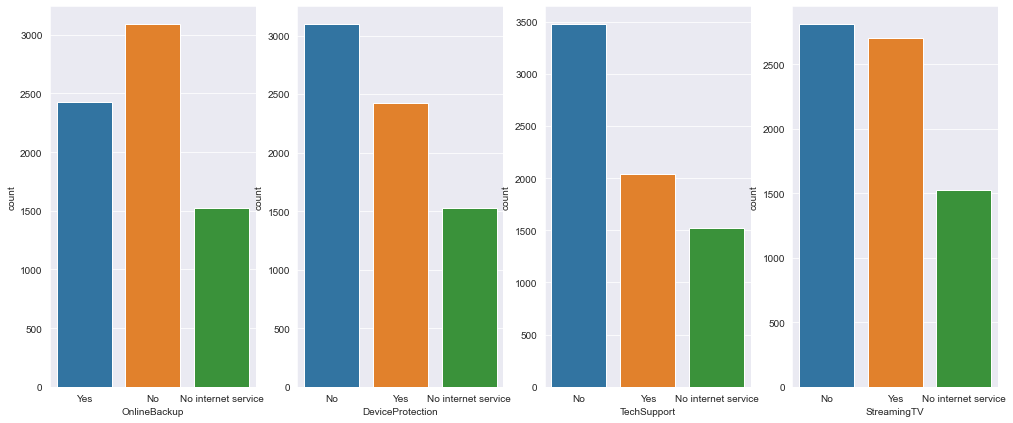

In [20]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'OnlineBackup',data = df,ax = axes[0]);
sns.countplot(x = 'DeviceProtection',data = df,ax = axes[1]);
sns.countplot(x = 'TechSupport',data = df,ax = axes[2]);
sns.countplot(x = 'StreamingTV',data = df,ax = axes[3]);

* ### OnlineBackup:
The count of Customers who have No online backup is greater than other categories.
* ### DeviceProtection
The count of customers who have No DeviceProtection is greter than the other categories.
* ### TechSupport
The count of customers who have No TechSupport is greater than the other categories.
* ### StreamingTV
The count of customers who have No StreamingTV is nearly equal to customers who have StreamingTV

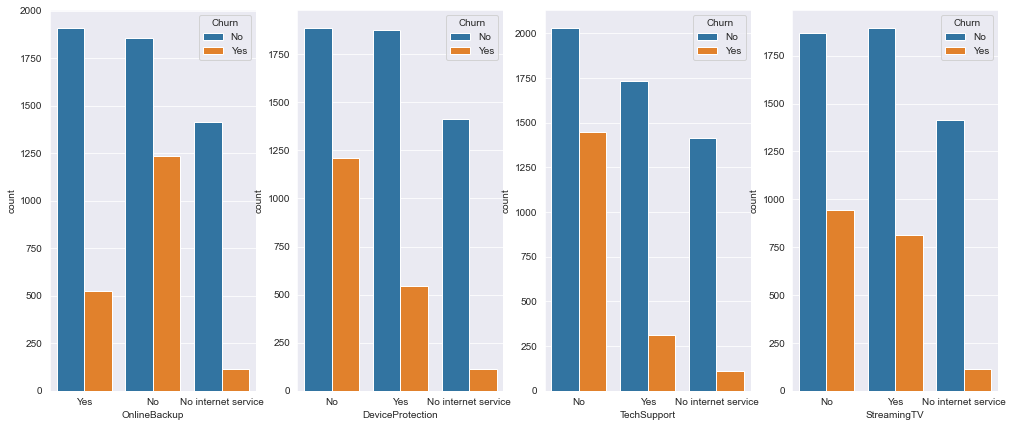

In [21]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'OnlineBackup',hue = "Churn",data = df,ax = axes[0]);
sns.countplot(x = 'DeviceProtection',hue = "Churn",data = df,ax = axes[1]);
sns.countplot(x = 'TechSupport',hue = "Churn",data = df,ax = axes[2]);
sns.countplot(x = 'StreamingTV',hue = "Churn",data = df,ax = axes[3]);

* ## The Count have Customers who have not churned for all these variables is greater than the people who have churned

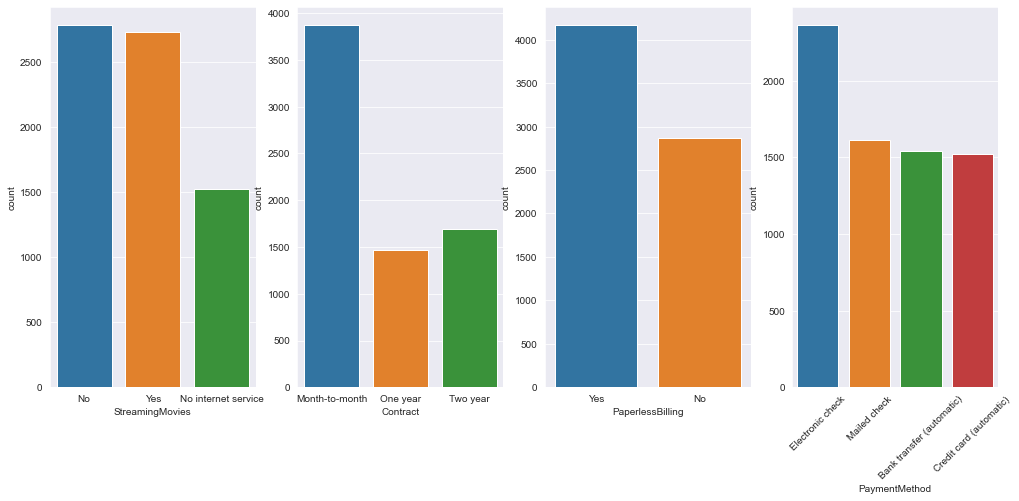

In [22]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'StreamingMovies',data = df,ax = axes[0]);
sns.countplot(x = 'Contract',data = df,ax = axes[1]);
sns.countplot(x = 'PaperlessBilling',data = df,ax = axes[2]);
sns.countplot(x = 'PaymentMethod',data = df,ax = axes[3]);
plt.xticks(rotation=45);

* ### StreamingMovies:
The count of customers who have no Streaming Movies and have streaming movies is almost the same.
* ### Contract:
The count of customers who have a month-to-month contract is significantly higher than all the other categories.
* ### PaperlessBilling:
The count of cusotmer who have Paperless billing is high when compared to customers who have no PaperlessBilling.
* ### PaymentMethod
The count of customers who pay via Electronic check is higher than other categories. All the other categories are almost the same

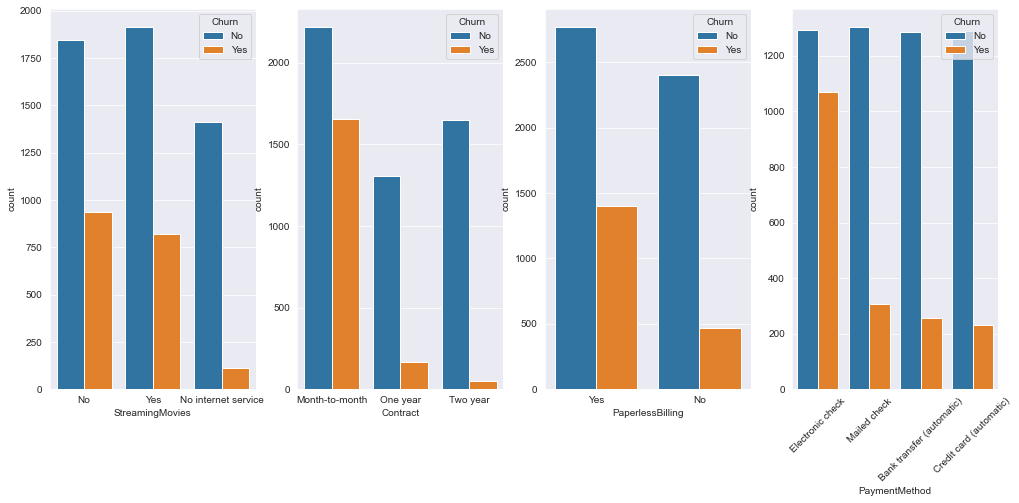

In [23]:
f, axes = plt.subplots(1, 4, figsize=(17,7))
sns.countplot(x = 'StreamingMovies',hue="Churn",data = df,ax = axes[0]);
sns.countplot(x = 'Contract',hue="Churn",data = df,ax = axes[1]);
sns.countplot(x = 'PaperlessBilling',hue="Churn",data = df,ax = axes[2]);
sns.countplot(x = 'PaymentMethod',hue="Churn",data = df,ax = axes[3]);
plt.xticks(rotation=45);

* ## The count of customers who have not churned are significantly higher than the count of customers who have churned is all the varibables.

## Bi-variate Analysis

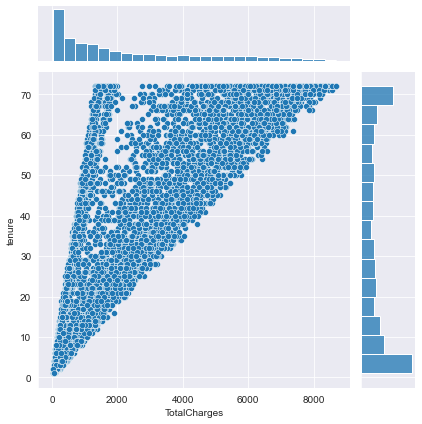

In [24]:
sns.jointplot(x = df['TotalCharges'],y = df['tenure'],data = df);

* ## There exists a linear relationship between tenure and total charges. This is common because as the tenure of a customer increase he/she will certainly be paying more which results in a linear relationship.

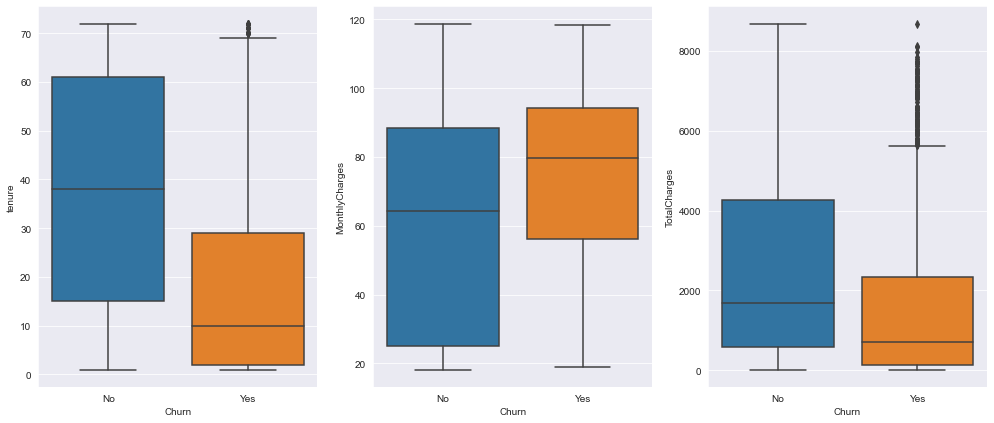

In [25]:
f, axes = plt.subplots(1, 3, figsize=(17,7))
sns.boxplot(x = 'Churn',y = 'tenure',data =df,ax = axes[0]);
sns.boxplot(x = 'Churn',y = 'MonthlyCharges',data =df,ax = axes[1]);
sns.boxplot(x = 'Churn',y = 'TotalCharges',data =df,ax = axes[2]);

* ## Churn(No):
Class belonging to Churn is No has higher mean and higher upper fence values in Tenure and TotalCharges.
* ## Churn(Yes):
Class belonging to Churn is Yes has higher mean in Monthly charges.

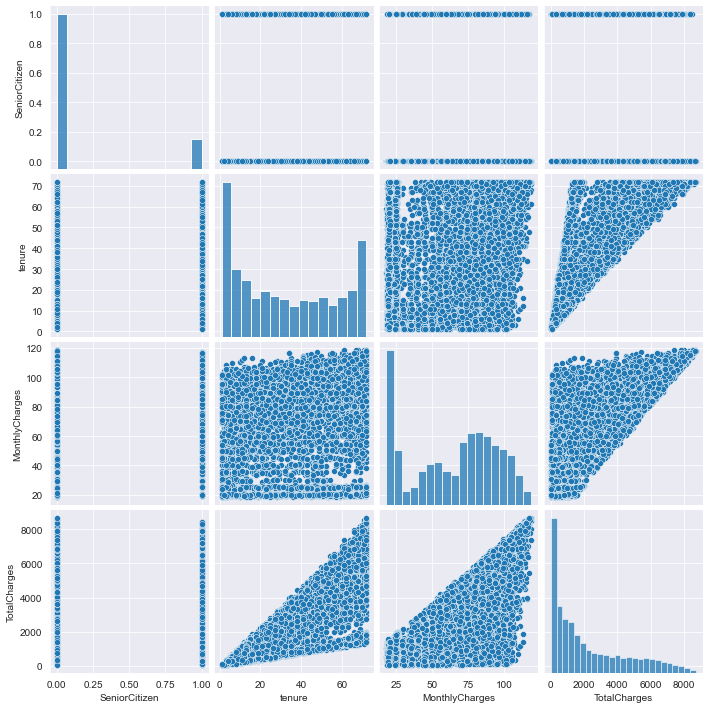

In [26]:
sns.pairplot(df);

* ### Along the diagonal we can see the distribution of individual variable

* ### MonthlyCharges and Total Charges are moderately positively correlated

* ### Tenure and Total Charges are highly positively correlated


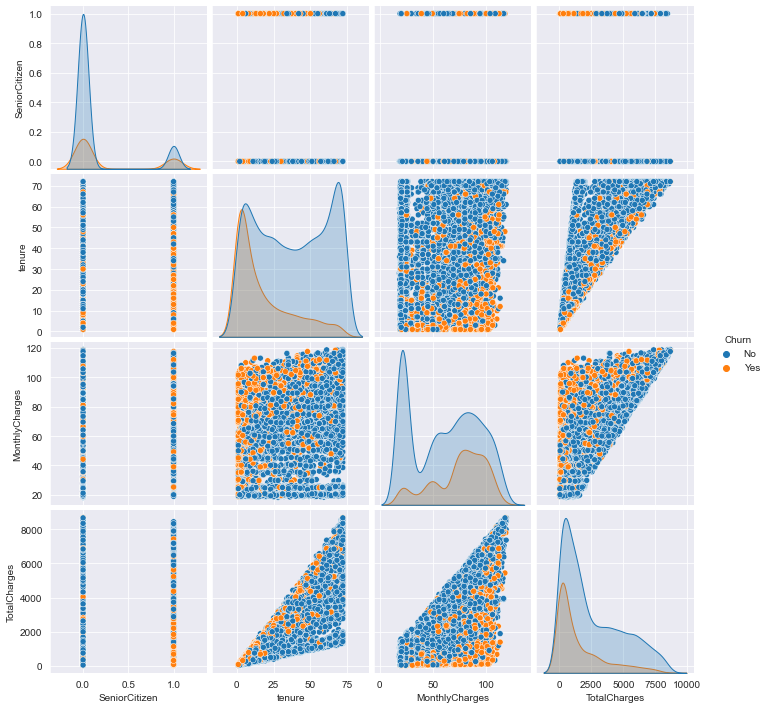

In [27]:
sns.pairplot(df,hue='Churn');

* ### The distribution of both the classes of the target variable are overlapping there is no specific limit where we can train the model on, so the model should be trained on the entire range of values for all the variables

* ### The number of point of Churn(No) is higher than tthe points of Churn(Yes).

Text(0.5, 1.0, 'Correlation Matrix of Data')

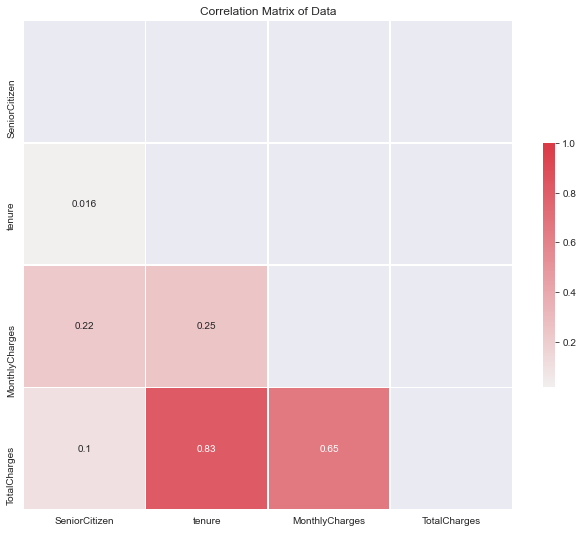

In [28]:
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')


* ### tenure:
  * Tenure has high positive correlation with TotalCharges of 0.83
  * Tenure has weak positive correlation with MonthlyCharges of 0.25
  * Tenure has almost no correlation with SeniorCitizen

* ### MonthlyCharges
  * MonthlyCharges is weakly correlated with both tenure and SeniorCitizen of about 0.25 and 0.22 respectively
  * MonthlyCharges and TotalCharges are moderately positive correlated with 0.65
  
* ### TotalCharges
  * TotalCharges has weak correlation with SeniorCitizen
  * TotalCharges has high positive correlation with tenure
  * TotalCharges has moderately positive correlation with MonthlyCharges

In [29]:
# replacing the value target variables with numerical values

df['Churn'].replace({'No':0,'Yes':1},inplace = True)

In [30]:
# checking the statistical significance of the continous variables

dfcol=['tenure','MonthlyCharges','TotalCharges']
for i in dfcol:
    a = np.array(df[df.Churn == 0][i]) 
    b = np.array(df[df.Churn == 1][i])
    t, p_value  = stats.ttest_ind(a,b, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of people who have churned and not churned are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of people who have churned and not churned are same'.format('\033[1m',i))
    print('\n')

 P_Value:1.2668823710362023e-234
 Rejecting Null Hypothesis.tenure of people who have churned and not churned are not same


 P_Value:8.592449331547539e-73
 Rejecting Null Hypothesis.MonthlyCharges of people who have churned and not churned are not same


 P_Value:2.0590752866918164e-75
 Rejecting Null Hypothesis.TotalCharges of people who have churned and not churned are not same




In [31]:
# checking the statistical significance of categorical variables

catcollist = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
              'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in catcollist:
    crosstab=pd.crosstab(df['Churn'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Churn)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n No significant difference in {} Feature for different category of target variable(Churn)'.format('\033[1m',i))
    print('\n')

 Fail to Reject Null Hypothesis.
 No significant difference in gender Feature for different category of target variable(Churn)


 Rejecting Null Hypothesis. 
 There is significant difference in SeniorCitizen Feature for different category of target variable(Churn)


 Rejecting Null Hypothesis. 
 There is significant difference in Partner Feature for different category of target variable(Churn)


 Rejecting Null Hypothesis. 
 There is significant difference in Dependents Feature for different category of target variable(Churn)


 Fail to Reject Null Hypothesis.
 No significant difference in PhoneService Feature for different category of target variable(Churn)


 Rejecting Null Hypothesis. 
 There is significant difference in MultipleLines Feature for different category of target variable(Churn)


 Rejecting Null Hypothesis. 
 There is significant difference in InternetService Feature for different category of target variable(Churn)


 Rejecting Null Hypothesis. 
 There is significant di

* ### There is no significant difference for Gender and PhoneService with the target variables

In [32]:
df_copy = df.copy(deep=True)

In [33]:
df_copy['gender'] = df_copy['gender'].replace({'Female':0,'Male':1})
df_copy['Partner'] = df_copy['Partner'].replace({'No':0,'Yes':1})
df_copy['Dependents'] = df_copy['Dependents'].replace({'No':0,'Yes':1})
df_copy['PhoneService'] = df_copy['PhoneService'].replace({'No':0,'Yes':1})
df_copy['MultipleLines'] = df_copy['MultipleLines'].replace({'No':0,'Yes':1,'No phone service':-1})
df_copy['OnlineSecurity'] = df_copy['OnlineSecurity'].replace({'No':0,'Yes':1,'No internet service':-1})
df_copy['OnlineBackup'] = df_copy['OnlineBackup'].replace({'No':0,'Yes':1,'No internet service':-1})
df_copy['DeviceProtection'] = df_copy['DeviceProtection'].replace({'No':0,'Yes':1,'No internet service':-1})
df_copy['TechSupport'] = df_copy['TechSupport'].replace({'No':0,'Yes':1,'No internet service':-1})
df_copy['StreamingTV'] = df_copy['StreamingTV'].replace({'No':0,'Yes':1,'No internet service':-1})
df_copy['StreamingMovies'] = df_copy['StreamingMovies'].replace({'No':0,'Yes':1,'No internet service':-1})
df_copy['PaperlessBilling'] = df_copy['PaperlessBilling'].replace({'No':0,'Yes':1})

oneHotCols=["InternetService","Contract","PaymentMethod"]
df_copy=pd.get_dummies(df_copy, columns=oneHotCols,drop_first = True)

In [34]:
absCorrwithDep = []
allVars = df_copy.drop('Churn', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df_copy['Churn'].corr(df_copy[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
4,tenure,0.354149
16,InternetService_Fiber optic,0.30802
19,Contract_Two year,0.302253
21,PaymentMethod_Electronic check,0.301919
17,InternetService_No,0.22789
15,TotalCharges,0.199037
14,MonthlyCharges,0.193356
13,PaperlessBilling,0.191825
18,Contract_One year,0.17782
11,StreamingTV,0.164673


* ### The observations from the correlation and statistical tests give us an idea about which features are highly correlated with one another and which feature do not contribute as much to the target variable. We can see that gender and PhoneService have almost no correlation with the target variable. Tenure and Totalcharges also has a high postive correlation. We are deciding not to drop them as we are using Ensemble techniques.

In [35]:
# manually encoding all the categorical variables so we can use these values at the GUI implementation

df['gender'] = df['gender'].replace({'Female':0,'Male':1})
df['Partner'] = df['Partner'].replace({'No':0,'Yes':1})
df['Dependents'] = df['Dependents'].replace({'No':0,'Yes':1})
df['PhoneService'] = df['PhoneService'].replace({'No':0,'Yes':1})
df['MultipleLines'] = df['MultipleLines'].replace({'No':0,'Yes':1,'No phone service':-1})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No':0,'Yes':1,'No internet service':-1})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No':0,'Yes':1,'No internet service':-1})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No':0,'Yes':1,'No internet service':-1})
df['TechSupport'] = df['TechSupport'].replace({'No':0,'Yes':1,'No internet service':-1})
df['StreamingTV'] = df['StreamingTV'].replace({'No':0,'Yes':1,'No internet service':-1})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No':0,'Yes':1,'No internet service':-1})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No':0,'Yes':1})

oneHotCols=["InternetService","Contract","PaymentMethod"]
df=pd.get_dummies(df, columns=oneHotCols,drop_first = True)

In [36]:
#Segregating target and predictor variables

X = df.drop(['Churn'],axis=1)
y = df['Churn']

In [37]:
# Checking for target imbalance

display(y.value_counts(normalize = True)*100)

0    73.463013
1    26.536987
Name: Churn, dtype: float64

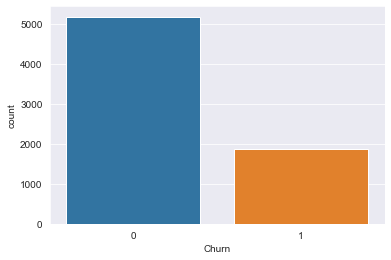

In [38]:
sns.countplot(x=y,data = df);

* ### There is a large imbalance in the target variable. The percentage of churn(No) is much greater than the percentage of Churn(Yes).
* ### We will fix this by using SMOTE(Synthetic Minority Oversampling Technique).This is a statistical technique for increasing the number of cases in your dataset in a balanced way

In [39]:
smote=SMOTE(random_state=42)
x_s,y_s=smote.fit_resample(X,y)

In [40]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0    5174
1    5174
Name: Churn, dtype: int64


In [41]:
# performing standard scaling as the columns have different units

sc = StandardScaler()
sc.fit(x_s)
X_scaled = sc.transform(x_s)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.862978,-0.395386,1.287939,-0.522918,-1.121137,-2.927903,-2.138557,-0.074184,1.377867,-0.175525,...,0.824046,-1.341337,-0.927434,-1.034615,-0.43727,-0.418459,-0.445553,-0.425768,1.354647,-0.464584
1,1.158778,-0.395386,-0.776434,-0.522918,0.259117,0.341541,-0.502585,1.583825,-0.168572,1.363744,...,-1.213524,-0.393716,-0.073793,-1.034615,-0.43727,2.389721,-0.445553,-0.425768,-0.738200,2.152463
2,1.158778,-0.395386,-0.776434,-0.522918,-1.079311,0.341541,-0.502585,1.583825,1.377867,-0.175525,...,0.824046,-0.502116,-0.891491,-1.034615,-0.43727,-0.418459,-0.445553,-0.425768,-0.738200,2.152463
3,1.158778,-0.395386,-0.776434,-0.522918,0.719201,-2.927903,-2.138557,1.583825,-0.168572,1.363744,...,-1.213524,-0.905991,-0.096171,-1.034615,-0.43727,2.389721,-0.445553,-0.425768,-0.738200,-0.464584
4,-0.862978,-0.395386,-0.776434,-0.522918,-1.079311,0.341541,-0.502585,-0.074184,-0.168572,-0.175525,...,0.824046,0.087088,-0.871523,0.966543,-0.43727,-0.418459,-0.445553,-0.425768,1.354647,-0.464584


In [42]:
# performing Train test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_s, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7243, 23), (3105, 23), (7243,), (3105,))

In [43]:
# performing train test split which will be used for the statistical analysis between the train,test and the original data

X_train_stats, X_test_stats, y_train_stats, y_test_stats = train_test_split(x_s, y_s, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7243, 23), (3105, 23), (7243,), (3105,))

In [44]:
print("The mean(MonthlyCharges) of train: ",X_train_stats['MonthlyCharges'].mean())
print("The mean(MonthlyCharges) of test: ",X_test_stats['MonthlyCharges'].mean())
print("The mean(MonthlyCharges) of original data: ",df['MonthlyCharges'].mean())
print("="*80)
print("The mean(TotalCharges) of train: ",X_train_stats['TotalCharges'].mean())
print("The mean(TotalCharges) of test: ",X_test_stats['TotalCharges'].mean())
print("The mean(TotalCharges) of original data: ",df['TotalCharges'].mean())
print("="*80)
print("The mean(tenure) of train: ",X_train_stats['tenure'].mean())
print("The mean(tenure) of test: ",X_test_stats['tenure'].mean())
print("The mean(tenure) of original data: ",df['tenure'].mean())

The mean(MonthlyCharges) of train:  68.1741052855038
The mean(MonthlyCharges) of test:  68.29193140967696
The mean(MonthlyCharges) of original data:  64.76169246059922
The mean(TotalCharges) of train:  2054.960775974551
The mean(TotalCharges) of test:  2039.2898308840822
The mean(TotalCharges) of original data:  2281.9169281556187
The mean(tenure) of train:  27.88635895376735
The mean(tenure) of test:  27.614788996665613
The mean(tenure) of original data:  32.43049836717308


* ### The mean(MonthlyCharges) for train, test and original data are almost equal
* ### The mean(TotalCharges) for train and test are nearly equal but the there is a lot of difference between train and test when compared with original data
* ### The mean(tenure) for train,test and original data are almost equal

In [45]:
print("The standard deviation(MonthlyCharges) of train: ",X_train_stats['MonthlyCharges'].std())
print("The standard deviation(MonthlyCharges) of test: ",X_test_stats['MonthlyCharges'].std())
print("The standard deviation(MonthlyCharges) of original data: ",df['MonthlyCharges'].std())
print("="*80)
print("The standard deviation(TotalCharges) of train: ",X_train_stats['TotalCharges'].std())
print("The standard deviation(TotalCharges) of test: ",X_test_stats['TotalCharges'].std())
print("The standard deviation(TotalCharges) of original data: ",df['TotalCharges'].std())
print("="*80)
print("The standard deviation(tenure) of train: ",X_train_stats['tenure'].std())
print("The standard deviation(tenure) of test: ",X_test_stats['tenure'].std())
print("The standard deviation(tenure) of original data: ",df['tenure'].std())

The standard deviation(MonthlyCharges) of train:  28.669515406100967
The standard deviation(MonthlyCharges) of test:  28.439275379197177
The standard deviation(MonthlyCharges) of original data:  30.09004709767854
The standard deviation(TotalCharges) of train:  2180.093382803982
The standard deviation(TotalCharges) of test:  2175.421331527325
The standard deviation(TotalCharges) of original data:  2265.2703984821865
The standard deviation(tenure) of train:  23.95283607778332
The standard deviation(tenure) of test:  23.81191041829555
The standard deviation(tenure) of original data:  24.527071009206068


* ### The standard deviation(MonthlyCharges) of train,test and original data are almost equal

* ### The standard deviation(TotalCharges) of train and test are equal while there is a difference from train,test and original dat

* ### The standard deviation(tenure) of train,test and original data are all the same

* ### We will use the oneway anova test to see if the train,test and original data are actually different when compared to both classes of the target variable.

In [46]:
for i in dfcol:
    df_data=df[df.Churn==1][i]
    df_train=X_train_stats[y_train_stats == 1][i]
    df_test=X_test_stats[y_test_stats==1][i]
    f_stats,p_value=stats.f_oneway(df_data,df_train,df_test)
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Train,Test and Original Data for churn=1 are not the same on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=1 are same on {}'.format('\033[1m',i))
    print('\n')

 p_value: 0.3184043871826125
 Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=1 are same on tenure


 p_value: 0.5351429775236662
 Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=1 are same on MonthlyCharges


 p_value: 0.2908142953903903
 Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=1 are same on TotalCharges




In [47]:
for i in dfcol:
    df_data=df[df.Churn==0][i]
    df_train=X_train_stats[y_train_stats == 0][i]
    df_test=X_test_stats[y_test_stats==0][i]
    f_stats,p_value=stats.f_oneway(df_data,df_train,df_test)
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Train,Test and Original Data for churn=0 are not the same on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=0 are same on {}'.format('\033[1m',i))
    print('\n')

 p_value: 0.9650916752800878
 Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=0 are same on tenure


 p_value: 0.7121473964714832
 Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=0 are same on MonthlyCharges


 p_value: 0.9188332340501351
 Fail to Reject Null Hypothesis.Train,Test and Original Data for churn=0 are same on TotalCharges




* ### We have compared the train and test data with the original data. The statistical tests shows that there is no difference between the train,test and original data for both the classes.

In [48]:
trainacc = []
testacc = []
modelname = ['RandomForestClassifier','BaggingClassifier','AdaBoostClassifier',
             'GradientBoostingClassifier','BaggingClassifier_Estimators','AdaBoostClassifier_Estimators',
             'GradientBoostingClassifier_Hyper','BaggingClassifier_Hyper','AdaBoostClassifier_Hyper',
            'RandomForestClassifier_Hyper']

* A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions     are True and how many are False. True Positives, False Positives, True negatives and False Negatives are used to predict the     metrics of a classification report


* TN / True Negative: when a case was negative and predicted negative
* TP / True Positive: when a case was positive and predicted positive
* FN / False Negative: when a case was positive but predicted negative
* FP / False Positive: when a case was negative but predicted positive
  
  
* Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is  defined as the ratio of true positives to the sum of true and false positives.
* Precision = TP/(TP + FP)


* Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true         positives to the sum of true positives and false negatives.

* Recall = TP/(TP+FN)


* The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.           F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb,     the weighted average of F1 should be used to compare classifier models, not global accuracy.


* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [49]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, rf.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_rf) * 100))
trainacc.append(accuracy_score(y_train, rf.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_rf) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_rf)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_rf)))

Training accuracy: 99.86%
Testing accuracy: 83.93%
Confusion matrix:
 [[1306  276]
 [ 223 1300]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1582
           1       0.82      0.85      0.84      1523

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



* RandomForestClassifier uses the decision trees.The random forest approach is a bagging method where deep trees, fitted on bootstrap samples, are combined to produce an output with lower variance. However, random forests also use another trick to make the multiple fitted trees a bit less correlated with each others: when growing each tree, instead of only sampling over the observations in the dataset to generate a bootstrap sample, we also sample over features and keep only a random subset of them to build the tree. Since we have not included any pruning methods the model has high variance(overfitting). Overfitting is when the training accuracy of the model is close to 100 percent but the testing accuracy is very less when compared to the training accuracy. We will further tune these ensemble models so that it does not have high variance.

In [50]:
bg = BaggingClassifier(random_state=5,n_jobs=-1,bootstrap=True,bootstrap_features=True)
bg.fit(X_train,y_train)
y_pred_bg = bg.predict(X_test)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, bg.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_bg) * 100))
print('='*80)
trainacc.append(accuracy_score(y_train, bg.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_bg) * 100)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_bg)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_bg)))

Training accuracy: 98.91%
Testing accuracy: 84.03%
Confusion matrix:
 [[1324  258]
 [ 238 1285]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1582
           1       0.83      0.84      0.84      1523

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



* Bagging is a parallel model.It often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.Bootstrap samples are often used. We can also see that the training accuracy is close to 100 percent and the testing accuracy is very low. This suggests that the model has high variance and is overfitting the data.

In [51]:
ada = AdaBoostClassifier(random_state=5)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, ada.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_ada) * 100))
print('='*80)
trainacc.append(accuracy_score(y_train, ada.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_ada) * 100)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_ada)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_ada)))

Training accuracy: 83.03%
Testing accuracy: 82.25%
Confusion matrix:
 [[1228  354]
 [ 197 1326]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1582
           1       0.79      0.87      0.83      1523

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



* Boosting is a sequential model that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy. The Training accuracy is 83 percent and the testing accuracy is 82 percent. This is a good model as it does not have high variance or high bias

In [52]:
gradientboosting = GradientBoostingClassifier(random_state=5)
gradientboosting.fit(X_train,y_train)
y_pred_gradientboosting = gradientboosting.predict(X_test)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, gradientboosting.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_gradientboosting) * 100))
print('='*80)
trainacc.append(accuracy_score(y_train, gradientboosting.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_gradientboosting) * 100)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_gradientboosting)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_gradientboosting)))

Training accuracy: 85.34%
Testing accuracy: 83.35%
Confusion matrix:
 [[1269  313]
 [ 204 1319]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1582
           1       0.81      0.87      0.84      1523

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



* GradientBoosting: Decision trees are used as the weak learner in gradient boosting. The training accuracy is 85 percent and the testing accuracy is 83 percent. This suggests that it is a good model which does not have high variance or high bias.

In [53]:
grid_bagging_estimators = GridSearchCV(BaggingClassifier(random_state=5), 
                    param_grid={'base_estimator':[KNeighborsClassifier(),GaussianNB(),LogisticRegression(),
                                                  SVC(),DecisionTreeClassifier(max_depth = 8,random_state=5)]}, 
                    cv=5, n_jobs=-1)
grid_bagging_estimators.fit(X_train, y_train)
y_pred_grid_bagging_estimators = grid_bagging_estimators.predict(X_test)
print('Best hyper parameter:', grid_bagging_estimators.best_params_)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, grid_bagging_estimators.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_grid_bagging_estimators) * 100))
trainacc.append(accuracy_score(y_train, grid_bagging_estimators.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_grid_bagging_estimators) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_grid_bagging_estimators)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_grid_bagging_estimators)))

Best hyper parameter: {'base_estimator': LogisticRegression()}
Training accuracy: 83.40%
Testing accuracy: 82.42%
Confusion matrix:
 [[1276  306]
 [ 240 1283]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1582
           1       0.81      0.84      0.82      1523

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



* GridSearchCV is used so as to try different base estimators for Bagging classifier. The training accuracy is 83 percent and the testing accuracy is 82 percent. This suggests that is a good model which does not have high variance and high bias

In [54]:
grid_adaboost_estimators = GridSearchCV(AdaBoostClassifier(random_state=5), 
                    param_grid={'base_estimator':[KNeighborsClassifier(),GaussianNB(),LogisticRegression(),
                                                  SVC(),DecisionTreeClassifier(max_depth = 8,random_state=5)]}, 
                    cv=5, n_jobs=-1)
grid_adaboost_estimators.fit(X_train, y_train)
y_pred_grid_adaboost_estimators = grid_adaboost_estimators.predict(X_test)
print('Best hyper parameter:', grid_adaboost_estimators.best_params_)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, grid_adaboost_estimators.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_grid_adaboost_estimators) * 100))
trainacc.append(accuracy_score(y_train, grid_adaboost_estimators.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_grid_adaboost_estimators) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_grid_adaboost_estimators)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_grid_adaboost_estimators)))

Best hyper parameter: {'base_estimator': DecisionTreeClassifier(max_depth=8, random_state=5)}
Training accuracy: 99.86%
Testing accuracy: 83.45%
Confusion matrix:
 [[1302  280]
 [ 234 1289]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1582
           1       0.82      0.85      0.83      1523

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



* GridSearchCV is used to try different base estimators for the adaboost technique. The training accuracy is 100 percent and the testing accuracy is 83 percent. This suggests that the model has high variance.

## We are trying different hyperparameters for all the ensemble models.

In [55]:
grid_gradient = GridSearchCV(GradientBoostingClassifier(random_state=5),
                            param_grid = {'n_estimators': [10, 15, 20, 25, 30,35,40,45,50],
                                'learning_rate':[0.001,0.01,0.1,0.2,0.5],
                                         'subsample':[0.5,0.6,0.7,0.8,0.9]},cv=5, n_jobs=-1)
grid_gradient.fit(X_train, y_train)
y_pred_grid_gradient = grid_gradient.predict(X_test)
print('Best hyper parameter:', grid_gradient.best_params_)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, grid_gradient.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_grid_gradient) * 100))
trainacc.append(accuracy_score(y_train, grid_gradient.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_grid_gradient) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_grid_gradient)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_grid_gradient)))

Best hyper parameter: {'learning_rate': 0.5, 'n_estimators': 45, 'subsample': 0.8}
Training accuracy: 87.16%
Testing accuracy: 83.00%
Confusion matrix:
 [[1286  296]
 [ 232 1291]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1582
           1       0.81      0.85      0.83      1523

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [56]:
grid_bagging = GridSearchCV(BaggingClassifier(random_state=5), 
                    param_grid={ 'base_estimator':[KNeighborsClassifier(n_neighbors=5),GaussianNB(),
                                                   LogisticRegression(),SVC()],
                                'n_estimators': [10, 15, 20, 25, 30,35,40,45,50],
                                'max_features':[6,7,8,9,10,11,12]}, 
                    cv=5, n_jobs=-1)
grid_bagging.fit(X_train, y_train)
y_pred_grid_bagging = grid_bagging.predict(X_test)
print('Best hyper parameter:', grid_bagging.best_params_)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, grid_bagging.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_grid_bagging) * 100))
trainacc.append(accuracy_score(y_train, grid_bagging.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_grid_bagging) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_grid_bagging)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_grid_bagging)))

Best hyper parameter: {'base_estimator': KNeighborsClassifier(), 'max_features': 12, 'n_estimators': 45}
Training accuracy: 90.58%
Testing accuracy: 82.87%
Confusion matrix:
 [[1250  332]
 [ 200 1323]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1582
           1       0.80      0.87      0.83      1523

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [57]:
grid_boosting = GridSearchCV(AdaBoostClassifier(random_state=5),
                    param_grid={ 'base_estimator':[KNeighborsClassifier(n_neighbors=5),GaussianNB(),LogisticRegression(),SVC()],
                                'n_estimators': [10, 15, 20, 25, 30,35,40,45,50],
                                'learning_rate':[0.001,0.01,0.1,0.2,0.5]}, 
                    cv=5, n_jobs=-1)
grid_boosting.fit(X_train, y_train)
y_pred_grid_boosting = grid_boosting.predict(X_test)
print('Best hyper parameter:', grid_boosting.best_params_)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, grid_boosting.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_grid_boosting) * 100))
trainacc.append(accuracy_score(y_train, grid_boosting.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_grid_boosting) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_grid_boosting)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_grid_boosting)))

Best hyper parameter: {'base_estimator': GaussianNB(), 'learning_rate': 0.1, 'n_estimators': 50}
Training accuracy: 82.13%
Testing accuracy: 81.67%
Confusion matrix:
 [[1219  363]
 [ 206 1317]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1582
           1       0.78      0.86      0.82      1523

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



In [58]:
grid_randomforest = GridSearchCV(RandomForestClassifier(random_state=5),
                                 param_grid={'n_estimators': [10, 15, 20, 25, 30,35,40,45,50],
                                'criterion': ['gini','entropy'],'max_depth':[1,3,5,10,15,20,30],
                                            'min_samples_split':[5,10,15],
                                            'min_samples_leaf':[5,10,15]},cv=5, n_jobs=-1)
grid_randomforest.fit(X_train, y_train)
y_pred_grid_randomforest = grid_randomforest.predict(X_test)
print('Best hyper parameter:', grid_randomforest.best_params_)
print('Training accuracy: %.2f%%' % (accuracy_score(y_train, grid_randomforest.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_grid_randomforest) * 100))
trainacc.append(accuracy_score(y_train, grid_randomforest.predict(X_train)) * 100)
testacc.append(accuracy_score(y_test, y_pred_grid_randomforest) * 100)
print('='*80)
print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred_grid_randomforest)))
print('='*80)
print('Classification report:\n %s' % (classification_report(y_test, y_pred_grid_randomforest)))

Best hyper parameter: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}
Training accuracy: 88.00%
Testing accuracy: 82.93%
Confusion matrix:
 [[1269  313]
 [ 217 1306]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1582
           1       0.81      0.86      0.83      1523

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



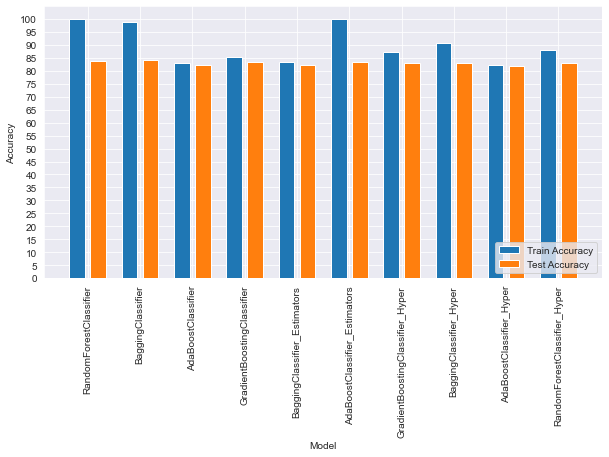

In [59]:
width = 0.30
x = np.arange(len(modelname))
plt.figure(figsize=(10,5))
plt.bar(x-0.2, trainacc, width,label = 'Train Accuracy')
plt.bar(x+0.2, testacc, width,label ='Test Accuracy')
plt.xticks(x,modelname)
plt.yticks(np.arange(0,105,5))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(['Train Accuracy', 'Test Accuracy'],loc = 'lower right')
plt.xticks(rotation=90);
plt.show()

In [60]:
acc_df = pd.DataFrame({'Model':modelname,'Training Accuracy':trainacc,'Testing Accuracy':testacc})
acc_df['Training Accuracy'] = round(acc_df['Training Accuracy'])
acc_df['Testing Accuracy'] = round(acc_df['Testing Accuracy'])
acc_df

,Model,Training Accuracy,Testing Accuracy
0,RandomForestClassifier,100.0,84.0
1,BaggingClassifier,99.0,84.0
2,AdaBoostClassifier,83.0,82.0
3,GradientBoostingClassifier,85.0,83.0
4,BaggingClassifier_Estimators,83.0,82.0
5,AdaBoostClassifier_Estimators,100.0,83.0
6,GradientBoostingClassifier_Hyper,87.0,83.0
7,BaggingClassifier_Hyper,91.0,83.0
8,AdaBoostClassifier_Hyper,82.0,82.0
9,RandomForestClassifier_Hyper,88.0,83.0


* ### We will choose the GradientBoostingClassifier_Hyper(grid_gradient) model with parameters learning_rate =  0.5, n_estimators =  45, subsample = 0.8. This model has an equal balance between bias and variance. The training accuracy is 87 percent and the testing accuracy is 83 percent, which shows that is does not have high variance or bias. The precision and recall for both the classes is almost the same. This model is performing good on the testing data. The Models like RandomForestClassifier,BaggingClassifier,AdaBoostClassifier_Estimators(with different base estimators),BaggingClassifier_Hyper have high variance,these models will not perform good or yield a high accuracy on test data.

* ### The models like AdaBoostClassifier,BaggingClassifier_Estimators,AdaBoostClassifier_Hyper(hyperparameter tuned) have a balance between variance and bias but when in comparison to the GradientBoostingClassifier_Hyper(hyperparameter tuned) model the accuracy on the testing set is more than all of above models.

In [61]:
# The best chosen model is pickled for future use

filename = 'FinalModel.sav'
pickle.dump(grid_gradient, open(filename, 'wb'))

## GUI Development

In [62]:
# importing the necessary GUI development library

import tkinter as tk

In [63]:
# creating a function so that the values entered in GUI can be saved in a dataframe

DF = pd.DataFrame()
def action():
    global DB
    DF = pd.DataFrame(columns = X_train.columns)
    
    #GENDER
    if gender_var.get()=="Female":
        GENDER = 0
    else:
        GENDER = 1    
    DF.loc[0,"gender"] = GENDER
        
    #SENIOR
    if SeniorCitizen_var.get() == 'No':
        SENIOR =  0
    else:
        SENIOR =  1
    DF.loc[0,"SeniorCitizen"] = SENIOR 
    
    #PARTNER
    if Partner_var.get() == "No":
        PARTNER = 0
    else:
        PARTNER = 1
    DF.loc[0,'Partner'] = PARTNER
    
        
    #DEPENDENTS
    if Dependents_var.get() == "No":
        DEPENDENTS = 0
    else:
        DEPENDENTS = 1
        
    DF.loc[0,'Dependents'] = DEPENDENTS
        
    #TENURE   
    TENURE = tenure_var.get()
    DF.loc[:,'tenure'] = TENURE
    
    #PHONESERVICE
    if PhoneService_var.get() == "No":
        PHONESERVICE = 0
    else:
        PHONESERVICE = 1
    DF.loc[0,'PhoneService'] = PHONESERVICE
    
    #MULTIPLELINES
    if MultipleLines_var.get()=="No phone service":
        MULTIPLELINES = -1
    elif MultipleLines_var.get()=="No":
        MULTIPLELINES = 0
    else:
        MULTIPLELINES = 1
    DF.loc[0,"MultipleLines"] = MULTIPLELINES
        
    #ONLINESECURITY
    if OnlineSecurity_var.get()=="No internet service":
        ONLINESECURITY = -1
    elif OnlineSecurity_var.get()=="No":
        ONLINESECURITY = 0
    else:
        ONLINESECURITY = 1
    DF.loc[0,"OnlineSecurity"] = ONLINESECURITY
    
    #ONLINEBACKUP
    if OnlineBackup_var.get()=="No internet service":
        ONLINEBACKUP = -1
    elif OnlineBackup_var.get()=="No":
        ONLINEBACKUP = 0
    else:
        ONLINEBACKUP = 1
    DF.loc[0,"OnlineBackup"] = ONLINEBACKUP
        
        
    #DEVICEPROTECTIONS
    if DeviceProtection_var.get()=="No internet service":
        DEVICEPROTECTIONS = -1
    elif DeviceProtection_var.get()=="No":
        DEVICEPROTECTIONS = 0
    else:
        DEVICEPROTECTIONS = 1
    DF.loc[0,"DeviceProtection"] = DEVICEPROTECTIONS
    
        
    #TECHSUPPORT
    if TechSupport_var.get()=="No internet service":
        TECHSUPPORT = -1
    elif DeviceProtection_var.get()=="No":
        TECHSUPPORT = 0
    else:
        TECHSUPPORT = 1
    DF.loc[0,"TechSupport"] = TECHSUPPORT
    
    
    #STREAMINGTV
    if StreamingTV_var.get()=="No internet service":
        STREAMINGTV = -1
    elif StreamingTV_var.get()=="No":
        STREAMINGTV = 0
    else:
        STREAMINGTV = 1
    DF.loc[0,'StreamingTV'] = STREAMINGTV
        
    #STREAMINGMOVIES
    if StreamingMovies_var.get()=="No internet service":
        STREAMINGMOVIES = -1
    elif StreamingMovies_var.get()=="No":
        STREAMINGMOVIES = 0
    else:
        STREAMINGMOVIES = 1
    DF.loc[0,'StreamingMovies'] = STREAMINGMOVIES
        
    #PAPERLESSBILING
    if PaperlessBilling_var.get() == "No":
        PAPERLESSBILING = 0
    else:
        PAPERLESSBILING = 1
    DF.loc[0,"PaperlessBilling"] = PAPERLESSBILING
        
    #INTERNETSERVICE InternetService_var "Fiber optic","DSL","No"
    if InternetService_var.get()=="Fiber optic":
        INTERNETSERVICE_fiber = 1
        INTERNETSERVICE_no = 0
    elif InternetService_var.get()=="No":
        INTERNETSERVICE_no = 1
        INTERNETSERVICE_fiber = 0
    else:
        INTERNETSERVICE_no = 0
        INTERNETSERVICE_fiber = 0
    DF.loc[0,"InternetService_No"] = INTERNETSERVICE_no
    DF.loc[0,"InternetService_Fiber optic"] = INTERNETSERVICE_fiber
    
    
    #CONTRACT Contract_var "One year","Two year","Month-to-month"
    if Contract_var.get() == "One year":
        CONTRACT_oneyear = 1
        CONTRACT_twoyear = 0
    elif Contract_var.get() == "Two year":
        CONTRACT_oneyear = 0
        CONTRACT_twoyear = 1
    else:
        CONTRACT_oneyear = 0
        CONTRACT_twoyear = 0
    DF.loc[0,"Contract_One year"] = CONTRACT_oneyear
    DF.loc[0,"Contract_Two year"] = CONTRACT_twoyear
        
    #PaymentMethod
    if PaymentMethod_var.get() == "Credit card (automatic)":
        PAYMENT_Creditcard = 1
        PAYMENT_electronic = 0
        PAYMENT_Mailed = 0
    elif PaymentMethod_var.get() == "Electronic check":
        PAYMENT_Creditcard = 0
        PAYMENT_electronic = 1
        PAYMENT_Mailed = 0
    elif PaymentMethod_var.get() == "Mailed check":
        PAYMENT_Creditcard = 0
        PAYMENT_electronic = 0
        PAYMENT_Mailed = 1
    else:
        PAYMENT_Creditcard = 0
        PAYMENT_electronic = 0
        PAYMENT_Mailed = 0
        
    DF.loc[0,"PaymentMethod_Credit card (automatic)"] = PAYMENT_Creditcard
    DF.loc[0,"PaymentMethod_Electronic check"] = PAYMENT_electronic
    DF.loc[0,"PaymentMethod_Mailed check"] = PAYMENT_Mailed
    
        
    #monthly charge
    MONTHLY = MonthlyCharges_var.get()
    
    DF.loc[0,"MonthlyCharges"] = MONTHLY
    
    
    #totalcharge
    TOTAL = TotalCharges_var.get()
    DF.loc[0,"TotalCharges"] = TOTAL
    
    print(DF.shape)
    DB = DF

In [64]:
# creating a function to apply the standard scalar for our dataframe and predict the output

global result
def output():
    for i in DB.columns:
        DB[i] = pd.to_numeric(DB[i])
    DB_scaled = sc.transform(DB)
    DB_scaled = pd.DataFrame(DB_scaled, columns=X_train.columns)
    output = gradientboosting.predict(DB_scaled)
    if output == 1:
        result = "Yes"
    elif output == 0:
        result = "No"
    Predict_entrybox.insert(1,str(result))

In [65]:
#creating the GUI front end screen so that values can be entered

my_w = tk.Tk()
my_w.geometry("1000x1000")
my_w.title("Churn Prediction")

gender_var = tk.StringVar(my_w)
gender_var.set("Female")
gender_label = tk.Label(my_w,text='Gender',width= 15)
gender_label.grid(row =5,column = 1)
gender_box = tk.OptionMenu(my_w,gender_var,"Male","Female")
gender_box.grid(row = 5,column=2)


SeniorCitizen_var = tk.StringVar(my_w)
SeniorCitizen_var.set("No")
SeniorCitizen_label = tk.Label(my_w,text='SeniorCitizen',width= 15)
SeniorCitizen_label.grid(row =6,column = 1)
SeniorCitizen_box = tk.OptionMenu(my_w,SeniorCitizen_var,"Yes","No")
SeniorCitizen_box.grid(row = 6,column=2)

Partner_var = tk.StringVar(my_w)
Partner_var.set('Yes')
Partner_label = tk.Label(my_w,text='Partner',width= 15)
Partner_label.grid(row =7,column = 1)
Partner_box = tk.OptionMenu(my_w,Partner_var,"Yes","No")
Partner_box.grid(row = 7,column=2)

Dependents_var = tk.StringVar(my_w)
Dependents_var.set("Yes")
Dependents_label = tk.Label(my_w,text='Dependents',width= 15)
Dependents_label.grid(row =8,column = 1)
Dependents_box = tk.OptionMenu(my_w,Dependents_var,"Yes","No")
Dependents_box.grid(row = 8,column=2)

tenure_var = tk.StringVar(my_w)
tenure_label = tk.Label(my_w,text='Tenure',width= 15)
tenure_label.grid(row =9,column = 1)
tenure_box = tk.Entry(my_w,textvariable=tenure_var)
tenure_box.grid(row = 9,column=2)

PhoneService_var = tk.StringVar(my_w)
PhoneService_var.set("Yes")
PhoneService_label = tk.Label(my_w,text='PhoneService',width= 15)
PhoneService_label.grid(row =10,column = 1)
PhoneService_box = tk.OptionMenu(my_w,PhoneService_var,"Yes","No")
PhoneService_box.grid(row = 10,column=2)

MultipleLines_var = tk.StringVar(my_w)
MultipleLines_var.set("Yes")
MultipleLines_label = tk.Label(my_w,text='MultipleLines',width= 15)
MultipleLines_label.grid(row =11,column = 1)
MultipleLines_box = tk.OptionMenu(my_w,MultipleLines_var,"Yes","No","No phone service")
MultipleLines_box.grid(row =11,column=2)

InternetService_var = tk.StringVar(my_w)
InternetService_var.set("DSL")
InternetService_label = tk.Label(my_w,text='InternetService',width= 15)
InternetService_label.grid(row =12,column = 1)
InternetService_box = tk.OptionMenu(my_w,InternetService_var,"Fiber optic","DSL","No")
InternetService_box.grid(row =12,column=2)

OnlineSecurity_var = tk.StringVar(my_w)
OnlineSecurity_var.set("Yes")
OnlineSecurity_label = tk.Label(my_w,text='OnlineSecurity',width= 15)
OnlineSecurity_label.grid(row =13,column = 1)
OnlineSecurity_box = tk.OptionMenu(my_w,OnlineSecurity_var,"Yes","No","No internet service")
OnlineSecurity_box.grid(row =13,column=2)

OnlineBackup_var = tk.StringVar(my_w)
OnlineBackup_var.set("Yes")
OnlineBackup_label = tk.Label(my_w,text='OnlineBackup',width= 15)
OnlineBackup_label.grid(row =14,column = 1)
OnlineBackup_box = tk.OptionMenu(my_w,OnlineBackup_var,"Yes","No","No internet service")
OnlineBackup_box.grid(row =14,column=2)


DeviceProtection_var = tk.StringVar(my_w)
DeviceProtection_var.set("Yes")
DeviceProtection_label = tk.Label(my_w,text='DeviceProtection',width= 15)
DeviceProtection_label.grid(row =15,column = 1)
DeviceProtection_box = tk.OptionMenu(my_w,DeviceProtection_var,"Yes","No","No internet service")
DeviceProtection_box.grid(row =15,column=2)

TechSupport_var = tk.StringVar(my_w)
TechSupport_var.set("Yes")
TechSupport_label = tk.Label(my_w,text='TechSupport',width= 15)
TechSupport_label.grid(row =16,column = 1)
TechSupport_box = tk.OptionMenu(my_w,TechSupport_var,"Yes","No","No internet service")
TechSupport_box.grid(row =16,column=2)

StreamingTV_var = tk.StringVar(my_w)
StreamingTV_var.set("Yes")
StreamingTV_label = tk.Label(my_w,text='StreamingTV',width= 15)
StreamingTV_label.grid(row =17,column = 1)
StreamingTV_box = tk.OptionMenu(my_w,StreamingTV_var,"Yes","No","No internet service")
StreamingTV_box.grid(row =17,column=2)

StreamingMovies_var = tk.StringVar(my_w)
StreamingMovies_var.set("Yes")
StreamingMovies_label = tk.Label(my_w,text='StreamingMovies',width= 15)
StreamingMovies_label.grid(row =18,column = 1)
StreamingMovies_box = tk.OptionMenu(my_w,StreamingMovies_var,"Yes","No","No internet service")
StreamingMovies_box.grid(row =18,column=2)

PaperlessBilling_var = tk.StringVar(my_w)
PaperlessBilling_var.set("Yes")
PaperlessBilling_label = tk.Label(my_w,text='PaperlessBilling',width= 15)
PaperlessBilling_label.grid(row =19,column = 1)
PaperlessBilling_box = tk.OptionMenu(my_w,PaperlessBilling_var,"Yes","No")
PaperlessBilling_box.grid(row =19,column=2)

Contract_var = tk.StringVar(my_w)
Contract_var.set("Month-to-month")
Contract_label = tk.Label(my_w,text='Contract',width= 15)
Contract_label.grid(row =20,column = 1)
Contract_box = tk.OptionMenu(my_w,Contract_var,"One year","Two year","Month-to-month")
Contract_box.grid(row =20,column=2)

PaymentMethod_var = tk.StringVar(my_w)
PaymentMethod_var.set("Electronic check")
PaymentMethod_label = tk.Label(my_w,text='PaymentMethod',width= 15)
PaymentMethod_label.grid(row =21,column = 1)
PaymentMethod_box = tk.OptionMenu(my_w,PaymentMethod_var,"Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)")
PaymentMethod_box.grid(row =21,column=2)

MonthlyCharges_var = tk.StringVar(my_w)
MonthlyCharges_label = tk.Label(my_w,text='MonthlyCharges',width= 15)
MonthlyCharges_label.grid(row = 22,column = 1)
MonthlyCharges_box = tk.Entry(my_w,textvariable=MonthlyCharges_var)
MonthlyCharges_box.grid(row =22,column=2)

TotalCharges_var = tk.StringVar(my_w)
TotalCharges_label = tk.Label(my_w,text='TotalCharges',width= 15)
TotalCharges_label.grid(row =23,column = 1)
TotalCharges_box = tk.Entry(my_w,textvariable=TotalCharges_var)
TotalCharges_box.grid(row = 23,column=2)


button = tk.Button(my_w, text="Submit", command=action)
button.grid(row= 24,column=1) 
button = tk.Button(my_w, text="Predict", command=output)
button.grid(row= 25,column=1)

Predict_entrybox = tk.Entry(my_w,width = 15)
Predict_entrybox.grid(row=25,column=2)


    
my_w.mainloop()

(1, 23)


* ## Data in total charge has " " string in it and this can be corrected. Data in tenure is zero for 11 rows, this is not possible and maybe due to human error.This can be corrected.

* ## More detail on the columns like Total charge and Monthly charge whether they are on the same scale.

* ## Tenure also has max value of 72. Details about the scale whether it is months or year would help in building better models. As 72 years would be close to impossible for a customer to avail a service

* ## The target class should be balanced.

* ## Columns like Number of complaints raised by the customer,Number of outages faced by the customer, The total minutes he/sher has talked on the phone and Number of time the customer has used TechServices can also help the Machine learning models to get better. Also columns like how many mnths/years have they used a specific service for can be included

* ## Total charge and tenure are higly correlated. Phone service and Gender has least correlation with the target variable

* ## Replacing columns like Multiple lines into a single column of phone service. The phone service should have value like 'Single line','No','Multiple Line'. This would reduce the need for many predictor variables


